## Data Visualization



1. Line Plots
2. Histograms and Density Plots
3. Box and Whisker Plots
4. Heat Maps
5. Lag Plots or Scatter Plots
6. Autocorrelation Plots

## Line Plots

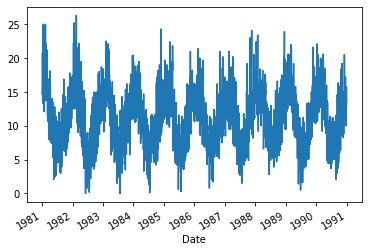

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

series = pd.read_csv('./dataset/daily-minimum-temperatures.csv', header=0, index_col=0,
                 parse_dates=True, squeeze=True)
series.plot()
plt.show()

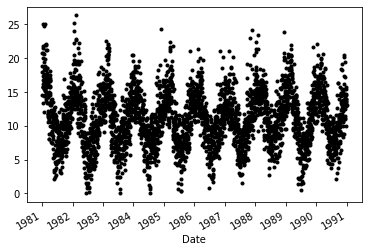

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

series = pd.read_csv('./dataset/daily-minimum-temperatures.csv', header=0, index_col=0,
                 parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.show()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64




     1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
0    20.7  17.0  18.4  19.5  13.3  12.9  12.3  15.3  14.3  14.8
1    17.9  15.0  15.0  17.1  15.2  13.8  13.8  14.3  17.4  13.3
2    18.8  13.5  10.9  17.1  13.1  10.6  15.3  13.5  18.5  15.6
3    14.6  15.2  11.4  12.0  12.7  12.6  15.6  15.0  16.8  14.5
4    15.8  13.0  14.8  11.0  14.6  13.7  16.2  13.6  11.5  14.3
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
360  15.5  15.3  13.9  12.2  11.5  14.6  16.2   9.5  13.3  14.0
361  13.3  16.3  11.1  12.0  10.8  14.2  14.2  12.9  11.7  13.6
362  15.6  15.8  16.1  12.6  12.0  13.2  14.3  12.9  10.4  13.5
363  15.2  17.7  20.4  16.0  16.3  11.7  13.3  14.8  14.4  15.7
364  17.4  16.3  18.0  16.4  14.4  17

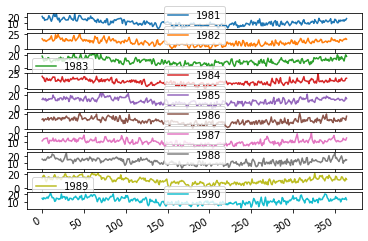

In [51]:
# 한년도에 대해서 1-12월을 나누어서 Line Plots을 나타내보겠다.

import pandas as pd
import matplotlib.pyplot as plt

print(series)
print('\n')

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
print(groups)
print('\n')

for name, group in groups:
    years[name.year] = group.values
print(years)
years.plot(subplots=True, legend=True)
plt.show()

 ## Histograms and Density Plots
 

* kde 는 kernel density estimation의 줄임말. 확률밀도함수를 추정

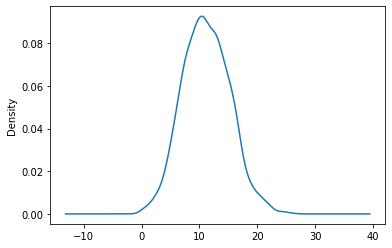

In [52]:
from pandas import read_csv
from matplotlib import pyplot

series.plot(kind='kde')
pyplot.show()

# 확률함수 아래 면적의 합은 1

## Box and Whisker Plots

* 시간 간격에 따른 분포를 알기 위한 방법
* 년도별 data를 나누고 년도별 box whisker plots을 그린다

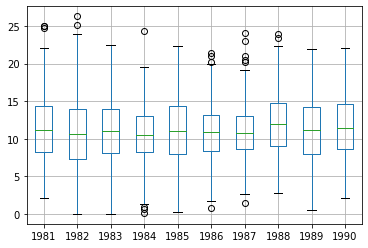

In [53]:
# 위에서 만든 groupby, Groubper를 사용. 거기에 추가적으로 boxlot 사용

years.boxplot()
plt.show()

# 박스의 초록선은 50퍼센트 값. 박스는 25퍼센트부터 75퍼센트 까지 분포를 보여줌
# 위 아래 - 선은 whisker라 하고 거의 모든 데이터 범위를 지정. 점은 이상치를 표시

# 이 데이터를 대략적으로 분석하면, 년도별 평균 온도는 비슷한데 전체 온도 분포는
# 조금씩 다르고 이상치도 다르다.

<ipython-input-66-fcf13dd3d4ef>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  months.columnes = range(1,13)


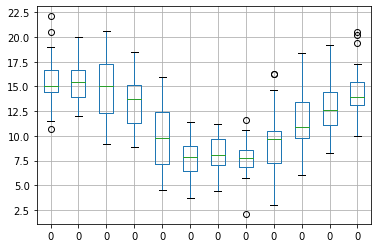

In [66]:
# 월마다의 데이터를 보고 싶을때

one_year = series['1990']
groups_M = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups_M], axis=1)
months = pd.DataFrame(months)
months.columnes = range(1,13)
months.boxplot()
plt.show()